In [1]:
import os
import sys
import xarray
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski


In [3]:
os.chdir('..')
print(os.getcwd())

C:\Users\patri\my_project


In [4]:
from key_handlers import key_functions
from image_handling.imagej_manager import ImageJManager
from file_handling.generic_handlers import get_files_by_extension, get_unique_wells_in_experiment, loop_iterator, extract_experiment_images, SetObservationMethod
from image_handling import image_functions

ij = ImageJManager('default').get_ij()

from image_handling import fiji_commands
from Tracker import Tracker
print(os.getcwd())

Failed to guess the Java version.


C:\Users\patri\my_project


In [5]:
# Example usage
path = r"D:\olympus_images\test\test\\"
tracker = Tracker(path+ 'tracking_file.json')
image_list = get_files_by_extension(r"D:\olympus_images\test\test", "vsi")

In [6]:
tracker.update_file_list(path, "vsi")

2025-02-11 13:05:14,961 - INFO - Tracker data saved.


['D:\\olympus_images\\test\\test\\\\20250124_102049_test-10-1-10-1_PK-DirectA_Image_A1-1.vsi',
 'D:\\olympus_images\\test\\test\\\\20250124_102049_test-10-1-10-1_PK-DirectA_Image_A1-2.vsi',
 'D:\\olympus_images\\test\\test\\\\20250124_102049_test-10-1-10-1_PK-FRET, PK-FRET_Image_A1-1.vsi',
 'D:\\olympus_images\\test\\test\\\\20250124_102049_test-10-1-10-1_PK-FRET, PK-FRET_Image_A1-2.vsi',
 'D:\\olympus_images\\test\\test\\\\20250124_102050_test-10-1-10-1_PK-DirectA_Image_A1-3.vsi',
 'D:\\olympus_images\\test\\test\\\\20250124_102050_test-10-1-10-1_PK-DirectA_Image_A1-4.vsi',
 'D:\\olympus_images\\test\\test\\\\20250124_102050_test-10-1-10-1_PK-DirectA_Image_A2-1.vsi',
 'D:\\olympus_images\\test\\test\\\\20250124_102050_test-10-1-10-1_PK-DirectA_Image_A2-2.vsi',
 'D:\\olympus_images\\test\\test\\\\20250124_102050_test-10-1-10-1_PK-DirectA_Image_A2-3.vsi',
 'D:\\olympus_images\\test\\test\\\\20250124_102050_test-10-1-10-1_PK-DirectA_Image_A2-4.vsi',
 'D:\\olympus_images\\test\\test\\\\20

In [7]:
#set observation method will a class that has predefined observation method
#or custom to avoid errors when handling.
obs = SetObservationMethod(obs_method_number=1).get_observation_method()
test_images_list = get_unique_wells_in_experiment(image_list)

for well in test_images_list:
    tmp_list = key_functions.get_unique_well_list(image_list, well)
    #8 images with four replicates with 2 sets of observations per well
    unique_replicate_int = loop_iterator(tmp_list, obs)
    for rep in range(unique_replicate_int+1):
        current_image_list = extract_experiment_images(tmp_list, rep)
        print(current_image_list)
    

current_image_list = extract_experiment_images(tmp_list, 1)
print(len(current_image_list))


[]
['D:\\olympus_images\\test\\test\\\\20250124_102049_test-10-1-10-1_PK-DirectA_Image_A1-1.vsi', 'D:\\olympus_images\\test\\test\\\\20250124_102049_test-10-1-10-1_PK-FRET, PK-FRET_Image_A1-1.vsi']
['D:\\olympus_images\\test\\test\\\\20250124_102049_test-10-1-10-1_PK-DirectA_Image_A1-2.vsi', 'D:\\olympus_images\\test\\test\\\\20250124_102049_test-10-1-10-1_PK-FRET, PK-FRET_Image_A1-2.vsi']
['D:\\olympus_images\\test\\test\\\\20250124_102050_test-10-1-10-1_PK-DirectA_Image_A1-3.vsi', 'D:\\olympus_images\\test\\test\\\\20250124_102050_test-10-1-10-1_PK-FRET, PK-FRET_Image_A1-3.vsi']
['D:\\olympus_images\\test\\test\\\\20250124_102050_test-10-1-10-1_PK-DirectA_Image_A1-4.vsi', 'D:\\olympus_images\\test\\test\\\\20250124_102050_test-10-1-10-1_PK-FRET, PK-FRET_Image_A1-4.vsi']
[]
['D:\\olympus_images\\test\\test\\\\20250124_102050_test-10-1-10-1_PK-DirectA_Image_A2-1.vsi', 'D:\\olympus_images\\test\\test\\\\20250124_102050_test-10-1-10-1_PK-FRET, PK-FRET_Image_A2-1.vsi']
['D:\\olympus_image

In [11]:
tmp_arr = fiji_commands.concat_xarrays(ij, current_image_list)

[java.lang.Enum.toString] CellSensReader initializing D:\olympus_images\test\test\20250124_102051_test-10-1-10-1_PK-DirectA_Image_B2-1.vsi
[java.lang.Enum.toString] CellSensReader initializing D:\olympus_images\test\test\20250124_102051_test-10-1-10-1_PK-FRET, PK-FRET_Image_B2-1.vsi


In [36]:
index(tmp_arr.dims) == 'row'

NameError: name 'index' is not defined

In [63]:
reshape_array = image_functions.reshape_image(tmp_list)
print(reshape_array.sizes)

ValueError: Invalid dimension order: The third dimension must be 'ch'. Current inferred order: ['row', 'col', 't', 'ch']. Please pass 'new_dim_list' explicitly.

In [11]:
print(image_functions.is_image_empty(reshape_array[:, :, 0]))

False


In [13]:
print(list(reshape_array.dims))

['row', 'col', 'ch']


In [1]:
aligned_images = image_functions.image_alignment(reshape_array)
print(aligned_images.sizes)

NameError: name 'image_functions' is not defined

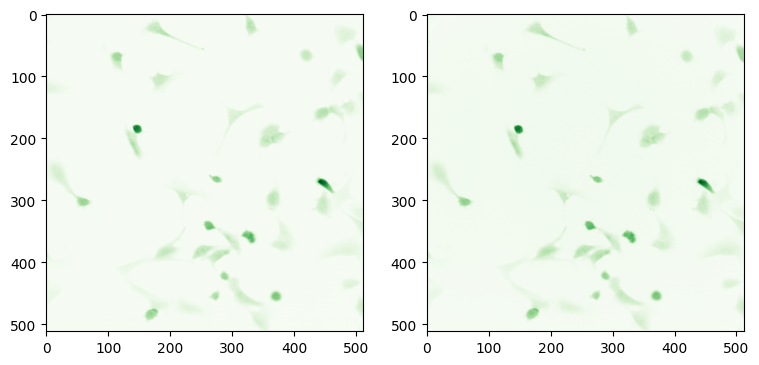

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(9,16))
aligned_images= image_functions.reshape_image(aligned_images)

ax[0].imshow(reshape_array[:, :, 0], cmap='Blues')
ax[0].imshow(reshape_array[:, :, 1], cmap='Greens')

ax[1].imshow(aligned_images[:, :, 0], cmap='Blues')
ax[1].imshow(aligned_images[:, :, 1], cmap='Greens')
ax[1].imshow(aligned_images[:, :, 2], cmap='Greens')


In [24]:
my_list = [1, 2, 3]
if 'r' in my_list:
    print(True)
else:
    print(False)

False


In [15]:
print('-' in x for x in ['A1-1', 'A2-2'])

<generator object <genexpr> at 0x0000023D0D4BC6C0>
